* ## 方法1

In [1]:
# 加载库和图片路径
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import color,filters,transform
from scipy import ndimage as ndi
from helper_functions import *
from tqdm import tqdm

base_img_rpath = '../dataset/document/'  #dataset-read path 读取图片
base_img_wpath = '../output/document/'   #output-write path 输出图片

#choices = 'document.png', 'color_mosaic.jpg', 'textbook.jpg', 'manuscript.jpg'

is_0_255 = True   #modifies algo if pixel values are 0-255 (False > color_mosaic), arg passed to functions.


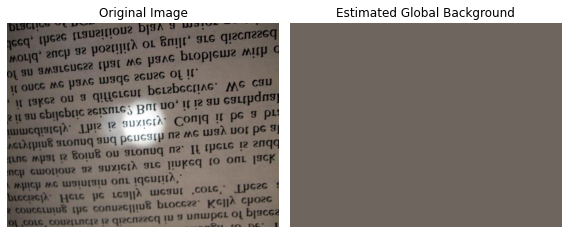

In [2]:
# 提取出全局背景色
ip_img = load_img(base_img_rpath + 'textbook.jpg')
choice = 1

if choice==1:
    # Global average over each channel  (Approach #1)  
    I_global = get_global_colour_1(ip_img,is_0_255)
elif choice==2:
    # Max pixel value for each channel  (Approach #2)
    I_global = get_global_colour_2(ip_img,is_0_255)
elif choice==3:
    # Average of top 50 pixels          (Approach #3)
    I_global = get_global_colour_3(ip_img,is_0_255)
f,ax = show_img_compare(ip_img, I_global, 'Original Image', 'Estimated Global Background')

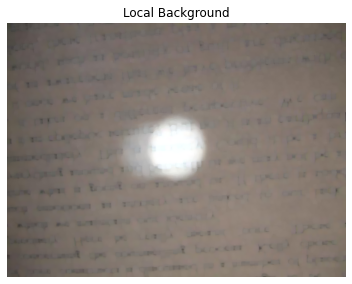

In [3]:
# 评估局部背景色
p = 0.9
block_size = 7
I_local = get_local_bg(ip_img,p, block_size, is_0_255)
f,ax = plot_img(I_local, "Local Background")

In [ ]:
# refined 局部背景色
threshold = 0.01
median_block_size = 17
I_local_refined = get_local_bg_refined(I_local, ip_img, threshold, median_block_size, is_0_255)
f,ax = plot_img(I_local_refined, "Refined Local Background")

In [ ]:
# 去阴影图片
generate_deshadow(ip_img, I_local, I_global, is_0_255)
I_deshadow = generate_deshadow(ip_img, I_local, I_global, is_0_255)
I_deshadow_refined = generate_deshadow(ip_img, I_local_refined, I_global, is_0_255)

# 对比展示效果
title1 = 'De-Shadowed Image'
title2 = 'Refined De-Shadowed Image'
f, a = show_img_compare(I_deshadow, I_deshadow_refined, title1, title2)